# Exploration of the first batch of validation results

# 0. Import dependencies and inputs

In [325]:
%run ../notebook_preamble_Transitions.ipy
from scipy.stats import pearsonr, spearmanr

# Validations results of the first batch
batch = pd.read_csv(data_folder + 'processed/validation/Transitions_to_validate_BATCH_1.csv')

# First batch of transitions
path_to_val_data = data_folder + 'restricted/validation/nesta_output_16Dec.csv'
batch_results = pd.read_csv(path_to_val_data)

# Occupation similarity matrices
sims = load_data.Similarities()


In [2]:
batch_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38334 entries, 0 to 38333
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   classification_id                 38334 non-null  int64 
 1   subject_ids                       38334 non-null  int64 
 2   origin_id                         38334 non-null  int64 
 3   origin_label                      38334 non-null  object
 4   origin_description                38334 non-null  object
 5   destination_id                    38334 non-null  int64 
 6   destination_label                 38334 non-null  object
 7   destination_description           38334 non-null  object
 8   perfectly_matched_skills          33496 non-null  object
 9   partially_matched_skills          33288 non-null  object
 10  unmatched_skills                  38076 non-null  object
 11  familiarity_with_origin_1-5       38334 non-null  int64 
 12  familiarity_with_d

# 1. Check the validations results dataset

## 1.1 Simple checks

In [4]:
batch_results.head()

,classification_id,subject_ids,origin_id,origin_label,origin_description,destination_id,destination_label,destination_description,perfectly_matched_skills,partially_matched_skills,...,familiarity_with_destination_1-5,feasibility_1-5,Reasons,coder_id,questionable_respondant_flag,year_of_birth,gender,background,highest_qualification,nation
0,289643147,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,2,3,**Qualifications** - different qualification r...,566802cf6d9c32c4b9d6,False,1994,Male,"['Education','Healthcare']",Master'degree,England
1,289715915,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,3,3,"**Skills** - poor skills overlap, missing esse...",dfaa44417fdef5173766,False,1967,Female,"['Healthcare', 'Sales and services']",Bachelor's degree,Scotland
2,289776880,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,1,2,"**Skills** - poor skills overlap, missing esse...",b929c3beb0e7ffb1ea4a,False,1984,Male,"['Education','Engineering and research']",Doctorate,England
3,289806895,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,4,1,**Qualifications** - different qualification r...,20df3373ab16becb8f2e,False,1987,Male,['Sales and services'],GCSE,Wales
4,290219173,52451278,29,legal guardian,Legal guardians legally assist and support min...,2654,employment and vocational integration consultant,Employment and vocational integration consulta...,give advice on personal matters; listen actively,facilitate job market access; develop course o...,...,2,2,**Qualifications** - different qualification r...,ef345455b53500fbb303,False,1986,Female,"['Business and administration', 'Public sector...",Bachelor's degree,England


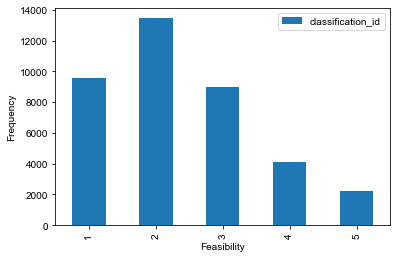

In [10]:
fig, ax = plt.subplots()

batch_results.groupby('feasibility_1-5').agg({'classification_id': 'count'}).plot.bar(ax=ax)
ax.set_xlabel('Feasibility')
ax.set_ylabel('Frequency');

The distribution of feasiability ratings appears to follow a skewed normal distribution with a mean of 2.37.

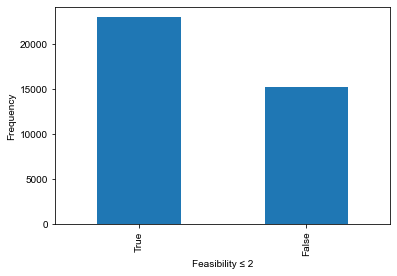

In [32]:
fig, ax = plt.subplots()

(batch_results['feasibility_1-5'] < 3).value_counts().plot.bar()
ax.set_xlabel('Feasibility ≤ 2')
ax.set_ylabel('Frequency');

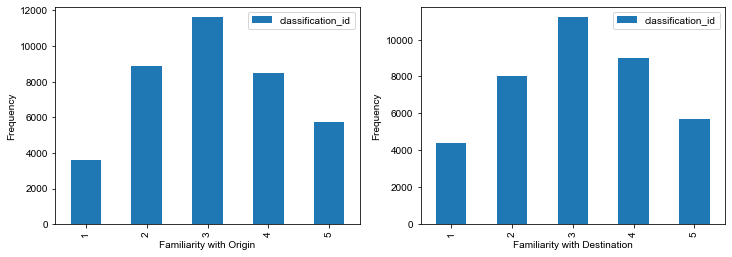

In [18]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

batch_results.groupby('familiarity_with_origin_1-5').agg({'classification_id': 'count'}).plot.bar(ax=axs[0])
axs[0].set_xlabel('Familiarity with Origin')
axs[0].set_ylabel('Frequency')
batch_results.groupby('familiarity_with_destination_1-5').agg({'classification_id': 'count'}).plot.bar(ax=axs[1])
axs[1].set_xlabel('Familiarity with Destination')
axs[1].set_ylabel('Frequency');

## 1.2 Feasibility and Familiarity

In [43]:
feasibility_familiarity = batch_results[
    ['feasibility_1-5', 'familiarity_with_origin_1-5', 'familiarity_with_destination_1-5']].corr()

feasibility_familiarity

,feasibility_1-5,familiarity_with_origin_1-5,familiarity_with_destination_1-5
feasibility_1-5,1.000000,0.229202,0.229297
familiarity_with_origin_1-5,0.229202,1.000000,0.703931
familiarity_with_destination_1-5,0.229297,0.703931,1.000000


The familiarity with the origin and destination occupations are correlated showing that coders generally had a similar level of familiartiy with both occupations when judging a transition. This familiarity does not seem to correlate strongly with the feasibility rating.

In [99]:
batch_results['familiarity_diff'] = (batch_results['familiarity_with_origin_1-5']
                                     - batch_results['familiarity_with_destination_1-5'])

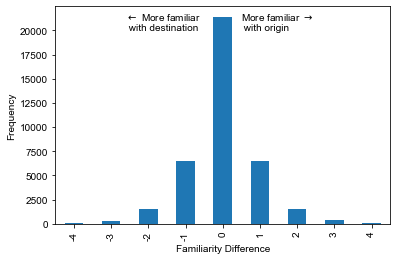

In [135]:
fig, ax = plt.subplots()

(batch_results['familiarity_diff']
 .value_counts().sort_index()
 .plot.bar(ax=ax))

ax.text(1.4, 20000, '$\leftarrow$ More familiar \n with destination')
ax.text(4.5, 20000, 'More familiar ' + r'$\rightarrow$'+ '\n with origin')
ax.set_xlabel('Familiarity Difference')
ax.set_ylabel('Frequency');

In over 20,000 cases, coders responded by saying that they had equal familiarity with the origin and destination occupations. In less than 15,000 cases, the absolute difference in familiarity was 1. It is very uncommon to find absolute differences of 2 or more.

The distribution of differences in familiarity is highly symmetric, indicating that coders found destinations that they were more familiar with as often as they found origin occupations that they were more familiar with. 

This all raises further questions:

- Do transitions with more familiar occupations have more consistent feasibility ratings between coders?
- Does the difference in familiarity affect the feasibilty rating?

In [140]:
transition_mean = (batch_results
 .groupby(['origin_id', 'destination_id'])
 [['feasibility_1-5', 'familiarity_with_origin_1-5', 'familiarity_with_destination_1-5', 'familiarity_diff']]
 .mean())

transition_std = (batch_results
 .groupby(['origin_id', 'destination_id'])
 [['feasibility_1-5', 'familiarity_with_origin_1-5', 'familiarity_with_destination_1-5', 'familiarity_diff']]
 .std())

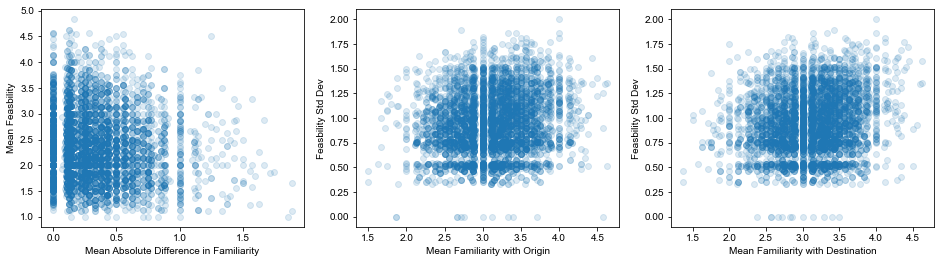

In [120]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 4))

axs[0].scatter(transition_mean['familiarity_diff'].abs(), transition_mean['feasibility_1-5'], alpha=0.15)
axs[0].set_xlabel('Mean Absolute Difference in Familiarity')
axs[0].set_ylabel('Mean Feasbility')

axs[1].scatter(transition_mean['familiarity_with_origin_1-5'], transition_std['feasibility_1-5'], alpha=0.15)
axs[1].set_xlabel('Mean Familiarity with Origin')
axs[1].set_ylabel('Feasbility Std Dev')

axs[2].scatter(transition_mean['familiarity_with_destination_1-5'], transition_std['feasibility_1-5'], alpha=0.15)
axs[2].set_xlabel('Mean Familiarity with Destination')
axs[2].set_ylabel('Feasbility Std Dev');

The difference in familiarity between origin and destination occupations seems to have a very limited negative correlation (-0.104) with the actual feasibility score. However, both very high and very low average feasibilities are recorded at all levels of familiarity difference. 

The familiarity of either the origin or destination does not lead to a wider dispersion in the feasibility rating.

## 1.3 Check the 'coders'

In [143]:
# Number of unique coders
len(batch_results.coder_id.unique())

349

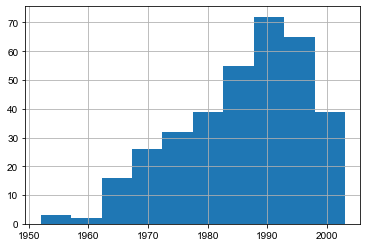

In [144]:
# Date of birth distribution
batch_results.drop_duplicates('coder_id').year_of_birth.hist()
plt.show()

In [145]:
# Gender distribution
coder_df = batch_results.drop_duplicates('coder_id')
coder_df.groupby('gender').agg({'coder_id': 'count'})

,coder_id
gender,
Female,139
Male,208
Prefer not to say,1
Prefer to self-describe,1


In [146]:
# Qualification distribution
coder_df = batch_results.drop_duplicates('coder_id')
coder_df.groupby('highest_qualification').agg({'coder_id': 'count'}).sort_values('coder_id')

,coder_id
highest_qualification,
Master'degree,8
Doctorate,9
Bachelor'degree,10
Higher National Certificate,19
Higher National Diploma,23
GCSE,27
A-Level,53
Master's degree,69
Bachelor's degree,131


In [147]:
# How many 'questionable' coders?
coder_df = batch_results.drop_duplicates('coder_id')
coder_df.groupby('questionable_respondant_flag').agg({'coder_id': 'count'})

,coder_id
questionable_respondant_flag,
False,344
True,5


In [148]:
# Coder locations
coder_df = batch_results.drop_duplicates('coder_id')
coder_df.groupby('nation').agg({'coder_id': 'count'})

,coder_id
nation,
England,301
Northern Ireland,3
Scotland,28
Wales,17


### 1.3.1 Check the activity of each coder

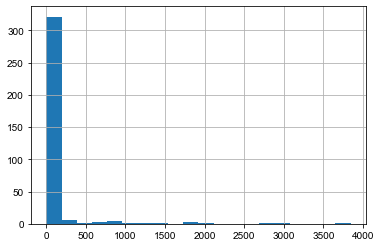

In [206]:
# Number of assessments by a coder
coder_counts = batch_results.groupby('coder_id').agg({'classification_id': 'count'})
coder_counts.classification_id.hist(bins=20)
plt.show()

Note the fat tail of the distribution - we should be aware of the outsized influence of 'super-users'.

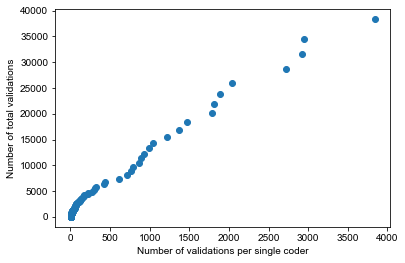

In [207]:
# Note: 50% of the total number of validations are provided by about 10 people 

# Plot an empirical cumulative distribution
x = np.sort(coder_counts.classification_id.to_list())
y = np.cumsum(x)
plt.scatter(x, y, linewidths=1)
plt.ylabel('Number of total validations')
plt.xlabel('Number of validations per single coder')
plt.show()

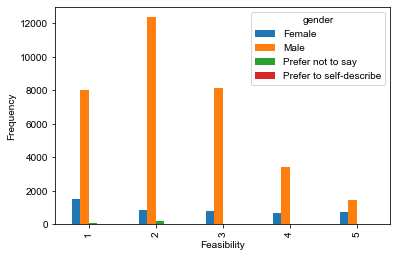

In [223]:
fig, ax = plt.subplots()

batch_results.groupby('gender')['feasibility_1-5'].value_counts().unstack(0).plot.bar(ax=ax)

ax.set_xlabel('Feasibility')
ax.set_ylabel('Frequency');

In [231]:
low_count_coder_ids = coder_counts[coder_counts['classification_id'] < 500].index.values

low_count_batch_results = batch_results.set_index('coder_id').loc[low_count_coder_ids].reset_index()

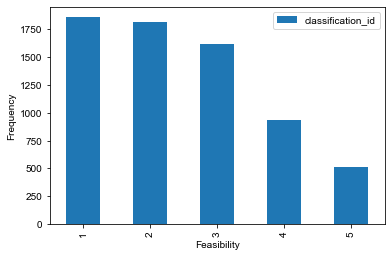

In [232]:
fig, ax = plt.subplots()

low_count_batch_results.groupby('feasibility_1-5').agg({'classification_id': 'count'}).plot.bar(ax=ax)
ax.set_xlabel('Feasibility')
ax.set_ylabel('Frequency');

## 1.4 Reasons for ratings

In [326]:
batch_results['reasons'] = batch_results['Reasons'].str.extract(r'.*?\*\*(.*)\*\*.*')
batch_results['reasons'] = batch_results['reasons'].str.lower().str.replace(' ', '_')
batch_results = batch_results.drop('Reasons', axis=1)

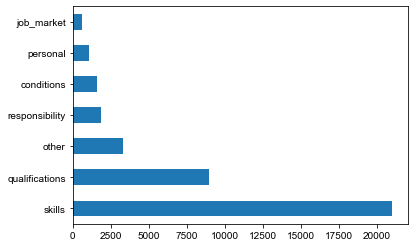

In [327]:
batch_results['reasons'].value_counts().plot.barh()

In [419]:
from sklearn.feature_extraction.text import CountVectorizer

In [460]:
transition_reasons = (batch_results.groupby(['origin_label', 'destination_label'])['reasons']
                      .apply(lambda x: ' '.join(list(x))))

cv = CountVectorizer()
cv.fit(transition_reasons)
reason_counts = pd.DataFrame(cv.transform(transition_reasons).todense(), columns=cv.get_feature_names())
reason_share = reason_counts.divide(reason_counts.sum(axis=1), axis=0)

reason_share.index = transition_reasons.index

In [461]:
reason_share = reason_share.join(
    batch_results
    .groupby(['origin_label', 'destination_label'])
    ['feasibility_1-5'].mean()
)

In [487]:
for skill in batch_results['reasons'].value_counts().index:
    df = reason_share[reason_share['feasibility_1-5'] < 2]
    df['inv_f'] = 5 - df['feasibility_1-5']
    df = df.sort_values([skill, 'inv_f'], ascending=False).head(10)
    print(skill.replace('_', ' ').title())
    [print('-', ' ==> '.join(_)) for _ in df.index.to_list()]
    print('')

Skills
- security guard ==> sauce production operator
- port coordinator ==> casino gaming manager
- employment programme coordinator ==> costume buyer
- insurance risk consultant ==> market research analyst
- ICT operations manager ==> wholesale merchant
- employment programme coordinator ==> book publisher
- telecommunications manager ==> radio producer
- travel agent ==> auctioneer
- ICT security manager ==> business developer
- sales engineer ==> talent agent

Qualifications
- user interface developer ==> architect
- relocation officer ==> lawyer
- food analyst ==> materials engineer
- insurance risk consultant ==> meteorologist
- orthoptist ==> pharmacist
- pipeline route manager ==> materials engineer
- orthoptist ==> specialist chiropractor
- corporate training manager ==> secondary school teacher
- optometrist ==> podiatrist
- optometrist ==> speech and language therapist

Other
- animation layout artist ==> dramaturge
- insurance agency manager ==> provincial governor
- commer

/Users/grichardson/miniconda3/envs/mapping_career_causeways/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 2. Check the coverage of transitions

See if all of the transitions provided by us have been tested by the validators

In [152]:
# Check that the # of transitions match
assert(len(batch) == len(batch_results.subject_ids.unique()))

In [153]:
# Check if any transitions are missing
df = batch.merge(batch_results[['origin_id', 'destination_id', 'subject_ids']],
                 on=['origin_id', 'destination_id'])
df[df.subject_ids.isnull()]

,origin_id,origin_label,origin_description,destination_id,destination_label,destination_description,perfectly_matched_skills,partially_matched_skills,unmatched_skills,subject_ids


In [154]:
df.sample()

,origin_id,origin_label,origin_description,destination_id,destination_label,destination_description,perfectly_matched_skills,partially_matched_skills,unmatched_skills,subject_ids
21732,1573,chief information officer,Chief information officers define and implemen...,106,integration engineer,Integration engineers develop and implement so...,manage ICT system deployment; ICT project mana...,design component interfaces; use scripting pro...,provide technical documentation; ICT communica...,53136991


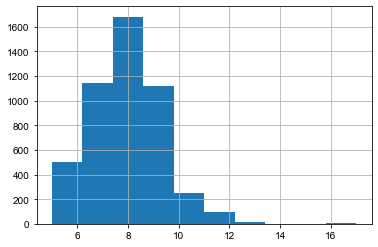

In [155]:
# Note: There are at least 5 ratings for each transition
transition_counts = batch_results.groupby('subject_ids').count()
transition_counts.classification_id.hist()
plt.show()

In [18]:
transition_counts.classification_id.min()

5

# 3. Check the correlation between feasibility and similarity measures

In [163]:
def get_similarities(df, W, col_name = 'similarity'):
    """ Find similarity values in matrix W, for transitions specified in dataframe df """
    sim_list = []
    for j, row in df.iterrows():
        sim = W[int(row.origin_id), int(row.destination_id)]
        sim_list.append(sim)
    df[col_name] = sim_list 
    return df


In [164]:
# Check the mean feasibility for each transition
batch_results_agg = batch_results.groupby('subject_ids').agg({'feasibility_1-5': 'mean'}).reset_index()

# Add occupation IDs 
batch_results_agg = batch_results_agg.merge(batch_results.drop_duplicates('subject_ids')[[
    'origin_id', 'destination_id',
    'origin_label', 'destination_label',
    'subject_ids']], on=['subject_ids'], how='left')

batch_results_agg.sample(5)

,subject_ids,feasibility_1-5,origin_id,destination_id,origin_label,destination_label
938,52683095,3.111111,1002,626,industrial engineer,fisheries refrigeration engineer
2829,52690669,2.750000,2879,2877,child day care centre manager,social pedagogue
3394,53136356,2.142857,625,718,food analyst,kettle tender
3549,53136511,3.375000,1002,2530,industrial engineer,civil engineer
1801,52685450,1.833333,1709,905,real estate agent,book editor


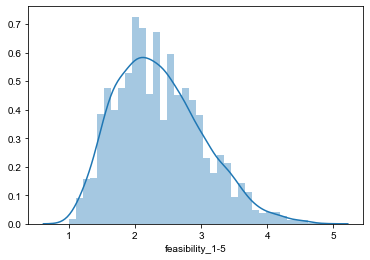

In [165]:
sns.distplot(batch_results_agg['feasibility_1-5'])
plt.show()

In [166]:
# Add similarity values to the table
df = get_similarities(batch_results_agg, sims.W_combined, col_name = 'similarity_combined')
df = get_similarities(df, sims.W_essential, col_name = 'similarity_essential_skills')
df = get_similarities(df, sims.W_all_to_essential, col_name = 'similarity_optional_skills')
df = get_similarities(df, sims.W_activities, col_name = 'similarity_activities')
df = get_similarities(df, sims.W_work_context, col_name = 'similarity_work_context')

In [167]:
df.head(2)

,subject_ids,feasibility_1-5,origin_id,destination_id,origin_label,destination_label,similarity_combined,similarity_essential_skills,similarity_optional_skills,similarity_activities,similarity_work_context
0,52451278,2.000000,29,2654,legal guardian,employment and vocational integration consultant,0.333975,0.117440,0.119270,0.374365,0.724825
1,52451279,2.888889,29,1803,legal guardian,special educational needs teacher,0.319810,0.019986,0.245352,0.305689,0.708213


### 3.1 Combined similarity measure

Pearson correlation: (0.5048958847092107, 8.7423649073263e-310)
Spearman correlation: SpearmanrResult(correlation=0.4540717972257877, pvalue=1.5244467586220288e-243)


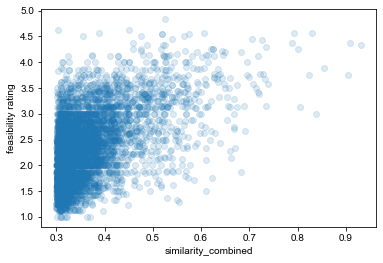

In [168]:
def plot_scatter(df=df, x='similarity', y='feasibility_1-5'):
    plt.scatter(
        x=df[x],
        y=df[y],
        alpha=0.15)
    plt.xlabel(x)
    plt.ylabel('feasibility rating')
    print(f'Pearson correlation: {pearsonr(df[x], df[y])}')
    print(f'Spearman correlation: {spearmanr(df[x], df[y])}')
    
plot_scatter(x='similarity_combined', y='feasibility_1-5')
plt.show()

In [169]:
# Check the least feasible transitions
# (definitely some odd ones there)
df.sort_values('feasibility_1-5').head(10)

,subject_ids,feasibility_1-5,origin_id,destination_id,origin_label,destination_label,similarity_combined,similarity_essential_skills,similarity_optional_skills,similarity_activities,similarity_work_context
1916,52685769,1.000000,1808,401,leather production planner,sport administrator,0.301525,3.664920e-02,5.833852e-02,0.317575,0.793537
735,52682588,1.000000,625,2107,food analyst,control panel tester,0.307304,4.930745e-02,7.381805e-02,0.294174,0.811918
597,52682320,1.000000,600,2076,security guard,aviation inspector,0.308610,1.716675e-03,1.838664e-03,0.535125,0.695761
1550,52684850,1.000000,1510,868,composer,lexicographer,0.319922,4.580137e-07,4.852017e-07,0.549244,0.730445
1684,52685190,1.000000,1608,1683,user interface developer,architect,0.315793,1.009241e-02,1.706451e-02,0.542906,0.693109
2621,52690178,1.000000,2638,2880,asset manager,natural resources consultant,0.308654,2.037628e-04,2.358368e-04,0.489680,0.744496
841,52682848,1.000000,827,517,credit union manager,police commissioner,0.363094,7.113894e-02,7.634649e-02,0.506420,0.798471
724,52682563,1.000000,625,2076,food analyst,aviation inspector,0.322703,4.551778e-02,4.701350e-02,0.509386,0.688894
2944,53135906,1.000000,29,2867,legal guardian,recreational therapist,0.370220,2.039885e-01,2.039885e-01,0.340975,0.731929
84,52451447,1.111111,89,1798,recruitment consultant,lawyer,0.308266,8.671955e-02,8.760312e-02,0.248739,0.810003


In [171]:
# Check the least feasible transitions
# (definitely some odd ones there)
df.sort_values('feasibility_1-5').tail(10)

,subject_ids,feasibility_1-5,origin_id,destination_id,origin_label,destination_label,similarity_combined,similarity_essential_skills,similarity_optional_skills,similarity_activities,similarity_work_context
3255,53136217,4.545455,519,2276,commodity broker,financial broker,0.574290,0.351733,0.692232,0.460479,0.792714
3627,53136589,4.545455,1062,732,steward/stewardess,hotel porter,0.519414,0.499334,0.832135,0.256504,0.489684
4361,53137323,4.555556,2058,2739,storyboard artist,cartoonist,0.519646,0.433538,0.551954,0.572711,0.520382
3557,53136519,4.571429,1002,2150,industrial engineer,process engineer,0.605071,0.520020,0.837764,0.195981,0.866520
4332,53137294,4.571429,2041,2477,statistician,statistical assistant,0.792985,0.855856,0.855910,0.666119,0.794055
1465,52684658,4.571429,1465,1746,travel agent,travel agency manager,0.387611,0.307883,0.308472,0.313823,0.620265
3095,53136057,4.571429,250,2816,commercial sales representative,advertising sales agent,0.829321,0.884118,0.998499,0.697822,0.736844
146,52451592,4.625000,139,573,shop assistant,bartender,0.302900,0.104503,0.196803,0.266477,0.643816
1175,52683772,4.625000,1196,2065,data entry clerk,data entry supervisor,0.450667,0.249218,0.568865,0.296492,0.688094
2460,52689775,4.833333,2490,2827,human resources officer,human resources manager,0.525282,0.270378,0.652685,0.356846,0.821218


### 3.2 Essential skills similarity measure

Pearson correlation: (0.49344376917301974, 7.252069694151854e-294)
Spearman correlation: SpearmanrResult(correlation=0.4492935561151007, pvalue=7.128221855634891e-238)


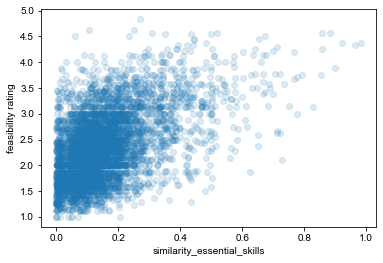

In [172]:
plot_scatter(x='similarity_essential_skills', y='feasibility_1-5')
plt.show()

### 3.3 Optional skills similarity measure

Note: Optional skills similarity measures the similarity between all ('essential' and 'optional') skills at the origin occupation, and the 'essential' skills at the destination occupation.

Pearson correlation: (0.6288769686136648, 0.0)
Spearman correlation: SpearmanrResult(correlation=0.6025283276711815, pvalue=0.0)


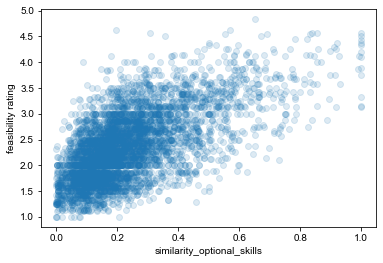

In [173]:
plot_scatter(x='similarity_optional_skills', y='feasibility_1-5')
plt.show()

### 3.4 Work activity similarity measure

Pearson correlation: (-0.04329436515399947, 0.0026627224037897982)
Spearman correlation: SpearmanrResult(correlation=-0.09098728850640937, pvalue=2.5521555825297216e-10)


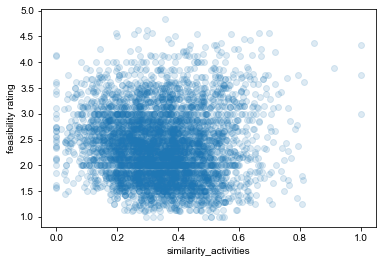

In [174]:
plot_scatter(x='similarity_activities', y='feasibility_1-5')

### 3.5 Work context similarity measure

Pearson correlation: (-0.08363440200729301, 6.214610889920733e-09)
Spearman correlation: SpearmanrResult(correlation=-0.031811937690583915, pvalue=0.027316606652262695)


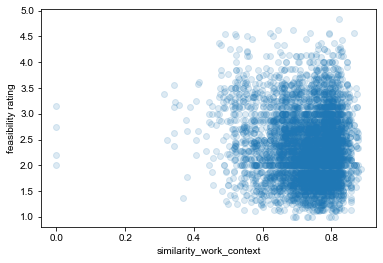

In [175]:
plot_scatter(x='similarity_work_context', y='feasibility_1-5')

## 4. Model

Model to predict transition feasibility:

- Create a binary vector of skill pairs to represent each job and train a regression model to predict feasibility
- Create a model of averaged origin and destination skill embeddings and train a regression model to predict feasibility